In [80]:
import pandas as pd
import numpy as np
import requests as req
import tweepy
import json
import matplotlib
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Gathering Data

## 1. Enhanced Twitter Archive Data

In [81]:
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
df_enhanced.info()

## 2. Twitter API Data

In [ ]:
consumer_key = 'gPB8ODXPnPpwQilQhLaxxxx'
consumer_secret = 'W7f5p61UP13C93TcriYiztTcFJpT8EW9M8GQP5wIVDxxxx'
access_token = '2792461009-kSoj1sKcFsJCpgapYIOdFP7GJr0Qtxxxx'
access_secret = 'NN07ghmK4xAgGo06WjLGdo2ST9GaJjOCxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

ids = df_enhanced['tweet_id']

In [ ]:
# creating a list for the exceptions
exceptions_list = []

# opening the file to write
with open('tweet_json.txt', 'w', encoding = 'utf-8') as f:
    for id_tweet in ids: 
        try:
            tweet = api.get_status(id_tweet, tweet_mode= 'extended')
            json.dump(tweet._json, f)
# writing the content witt new paragraphs
            f.write("\n")
        except Exception as e:
            exceptions_list.append(id_tweet)
# printing out the exception messages
            print(str(e))

In [38]:
df_json = pd.read_json('tweet_json.txt', orient='records', lines = True)
df_json.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'user_mentions': [], 'symbols': [], 'hashtags...",{'media': [{'media_url': 'http://pbs.twimg.com...,38696,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8561,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,{'profile_background_image_url': 'http://abs.t...
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'user_mentions': [], 'symbols': [], 'hashtags...",{'media': [{'media_url': 'http://pbs.twimg.com...,33173,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6296,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,{'profile_background_image_url': 'http://abs.t...
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'user_mentions': [], 'symbols': [], 'hashtags...",{'media': [{'media_url': 'http://pbs.twimg.com...,24968,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4177,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,{'profile_background_image_url': 'http://abs.t...


## 3. Image Predictions File

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = req.get(url, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(r.content)

In [64]:
df_breed = pd.read_csv('image-predictions.tsv', sep = '\t')
df_breed.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


# Assessing Data

## 1. Enhanced Twitter Archive Data

This data contains empty columns, So I will remove then as a first step.

In [36]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scaled         2175 non-null float64
dog_name                 2172 non-null object
stages                   2175 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 266.9+ KB


In [82]:
df_enhanced.groupby('name')['name'].size()

name
Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old    

In [ ]:
df_enhanced['name'].describe()

## 2. Twitter API Data

In [41]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2345 non-null datetime64[ns]
display_text_range               2345 non-null object
entities                         2345 non-null object
extended_entities                2069 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null bool
full_text                        2345 non-null object
geo                              0 non-null float64
id                               2345 non-null int64
id_str                           2345 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [42]:
len(df_json.query('retweeted == True'))

0

In [43]:
df_json[df_json['id'].duplicated(keep=False)]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


In [44]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2345 non-null datetime64[ns]
display_text_range               2345 non-null object
entities                         2345 non-null object
extended_entities                2069 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null bool
full_text                        2345 non-null object
geo                              0 non-null float64
id                               2345 non-null int64
id_str                           2345 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

## 3. Image Predictions File

In [39]:
df_breed.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [40]:
df_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Assessing Summary


**Tidiness:**

- There are 3 dataset instead of 1 main dataset

*df_enhanced dataset:*

- Source column with hardly readable information
- Unecessary category columns: doggo, floofer, pupper, puppo

*df_breed dataset:*

- no need of infos of some columns:
- Too many stages column instead of one
- Stages column could be categorical datatype

**Quality:**

*df_enhanced dataset:*

- The dog_stage is string datatype
- Unecessary rating denominator column, rating numerator column header without scale
- Incorrect names or missing names in name column such as, a, an, the... - all are written with lower case letters
- Retweeted records: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- Missing data in name and stages columns showing as 'None'
- Incorrect datatypes: timestamp is string
- The columns -> in_reply_to_status_id, in_reply_to_user_id should be changed from sciantific float to string
- Wrong rating numeratores were extracted from the text column

*df_breed dataset:*

- Dog breeds start with lower case letters
- Non-dog records in the dataset (eg.: shopping cart, box turtle...)
- The p1, p2, p3 columns should be categorical datatypes

# **Cleaning Data**


## I. df_enhanced Data

#### Define:

- Retweeted records in the dataset: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Code:

- I wanted to analyze the orignal ratings not the retweeted ones. I queried the records where the retweeted status was not null and dropped the values. 
- I also dropped the unecessary retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns.

In [3]:
# the number of retweeted tweets from df_enhanced dataframe
#df_enhanced.dropna(axis=1, inplace=True)
#df_enhanced.head(3)
len(df_enhanced.query('retweeted_status_id != "NaN"'))

181

In [4]:
# storing only the original ratings in the df_enhanced dataframe
df_enhanced = df_enhanced.query('retweeted_status_id == "NaN"')

#### Test:

In [5]:
# Check the length after removing the retweeted tweets
len(df_enhanced.query('retweeted_status_id != "NaN"'))

0

In [6]:
# removing the unnecessary columns
df_enhanced = df_enhanced.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### **Define:**

- Unecessary rating denominator column, rating numerator column header without scale

**Code:**

- I dropped the rating denominator column and add a scale to the numerator column in the title.

In [7]:
# Delete the unecessary rating denominator column
df_enhanced = df_enhanced.drop('rating_denominator', axis=1)

In [8]:
# Rename the rating numerator 
df_enhanced = df_enhanced.rename(index=str, columns={"rating_numerator": "rating_10_scaled"})

#### Test:

In [9]:
df_enhanced.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scaled,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None


In [10]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scaled         2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 237.9+ KB


#### Define:

- The datatype of the rating_10_scaled column is int when it supposed to be float.


#### Code:

- Change the datatype of the rating_10_scaled column to float and extract the right values using regex from the text column.

In [11]:
# setting the rating_10_scale column to float
df_enhanced['rating_10_scaled'] = df_enhanced['rating_10_scaled'].astype('float')

In [12]:
# check the datatype of the column
df_enhanced['rating_10_scaled'].dtypes

dtype('float64')

In [13]:
# save values into dataframe where text contains decimals
df_wrong_rating = df_enhanced[df_enhanced.text.str.contains(r"(\d+\.\d*\/\d+)")]

# creating a list to append the extracted values
l = []
for item in  df_wrong_rating['text']:
    l.append(item.split('/')[0].split()[-1])
print(l)

['13.5', '9.75', '11.27', '9.5', '11.26']


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [14]:
# replace wrong ratings with the right ones 
for index in df_wrong_rating.index:
    df_enhanced['rating_10_scaled'][index] =  df_wrong_rating['rating_10_scaled'][index]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scaled         2175 non-null float64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 317.9+ KB


#### Define:

- Issues in name column: missing values, missing values marked as None, incorrect values

#### Code:

- I need to extract the dog names from the text columns to replace the missing values and correct the incorrect dog names. 

- The valied dog names start with upper-case letters.

- These are some expressions when the dog names occur in the text column:

        - ... named [Dog Name]
        - meet [Dog Name]
        - .. name is [Dog Name]
        - This is [Dog Name]
        - Say hello to [Dog Name]
        - Meet [Dog Name]
        - Here we have [Dog Name]
        - Here is [Dog Name]

In [16]:
import re

# Creating a list of the texts
text_list = df_enhanced['text'].values.tolist()

# Creating a regex pattern
pattern = re.compile('([A-Z].*)')

# Iterating thourgh the text list and check if the content and pattern correspond to some of the extressions
#df_enhanced = df_enhanced.drop('dog_name', axis=1)
#df_enhanced.insert(loc= 9, value = str(np.NAN) , column= 'dog_name')
df_enhanced['dog_name'] = df_enhanced['name'].astype('str')

for text in df_enhanced['text']:
    
    i = df_enhanced.index[df_enhanced['text'] == text]
    if text.__contains__('This is') and pattern.fullmatch(text.split()[text.split().index("is")+1]):
        df_enhanced['dog_name'][i] = text.split(" ")[2].strip('.').strip(',')
    elif text.startswith("Meet") and pattern.fullmatch(text.split(" ")[1]):
        df_enhanced['dog_name'][i] = text.split(" ")[1].strip('.').strip(',')
    elif text.startswith("Here we have") and pattern.fullmatch(text.split(" ", 3)[3]):
        df_enhanced['dog_name'][i] = text.split(" ")[3].strip('.').strip(',')
    elif text.split(" ").__contains__("named") and pattern.fullmatch(text.split()[text.split().index("named")+1]):
        df_enhanced['dog_name'][i] = text.split()[text.split().index("named")+1].strip('.').strip(',')
    elif text.__contains__("name is") and pattern.fullmatch(text.split()[text.split().index("is")+1]):
        df_enhanced['dog_name'][i] = text.split()[text.split().index("is")+1].strip('.').strip(',')
    elif text.__contains__("Say hello to") and pattern.fullmatch(text.split()[text.split().index("to")+1]):
        df_enhanced['dog_name'][i] = text.split(" ")[3].strip('.').strip(',')
    else:
        df_enhanced['dog_name'][i] = "NaN"

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

#### Test:

In [17]:
# Number of Columns with missing names
len(df_enhanced[df_enhanced['dog_name'] == 'NaN'])

755

In [18]:
# Number of Columns with with right extracte names
len(df_enhanced[df_enhanced['dog_name'] != 'NaN'])

1420

In [19]:
# view the values of the new dog_name column
df_enhanced[['dog_name']].groupby(['dog_name'])['dog_name'].size()

dog_name
Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfonso         1
Alfredo         1
Alfy            1
Alice           2
Alphred         1
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
               ..
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Wylie           1
Yoda            1
Yogi            2
Yukon           1
Zara            1
Zeek            1
Zeke            3
Zeus            2
Ziva            1
Zoe             1
Z

Now dog names make more sense than before, but the values with lowercase letters needs to be replaced with NaN.

In [20]:
df_enhanced['dog_name'] = df_enhanced['dog_name'].replace(to_replace = r'^([a-z])', value = np.nan, regex = True)

In [21]:
# Check the final result of the dog_name column
df_enhanced[['dog_name']].groupby(['dog_name'])['dog_name'].size()

dog_name
Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfonso         1
Alfredo         1
Alfy            1
Alice           2
Alphred         1
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
               ..
Wallace         3
Wally           2
Walter          3
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Wylie           1
Yoda            1
Yogi            2
Yukon           1
Zara            1
Zeek            1
Zeke            3
Z

In [22]:
# Drop the original name column
df_enhanced = df_enhanced.drop('name', axis = 1)

#### Define:

Incorrect datatypes (timestamp, retweetd_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Code:

Changing the incorrect data types:

    timestamp
    retweeted_status_id
    retweeted_status_user_id

In [23]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scaled         2175 non-null float64
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dog_name                 2172 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 317.9+ KB


In [24]:
df_enhanced.timestamp = pd.to_datetime(df_enhanced.timestamp)

In [25]:
df_enhanced['in_reply_to_status_id'] = df_enhanced.in_reply_to_status_id.map(lambda x: '{:.0f}'.format(x))
df_enhanced['in_reply_to_user_id'] = df_enhanced.in_reply_to_user_id.map(lambda x: '{:.0f}'.format(x))

#### Test

In [26]:
df_enhanced.info()
df_enhanced[df_enhanced['in_reply_to_status_id'] != 'nan'].head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scaled         2175 non-null float64
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dog_name                 2172 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 317.9+ KB


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scaled,doggo,floofer,pupper,puppo,dog_name
30,886267009285017600,886266357075128320,2281181600,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12.0,None,None,None,None,NaN
55,881633300179243008,881607037314052096,47384430,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17.0,None,None,None,None,NaN
64,879674319642796034,879553827334172672,3105440746,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14.0,None,None,None,None,NaN


#### Define:

- Unecessary category columns: doggo, floofer, pupper, puppo

#### Code:

- I merged the dog stage columns into one column.

In [27]:
df_enhanced['stages'] = np.nan
df_enhanced['stages'] = df_enhanced['stages'].astype('str')
for i in range(len(df_enhanced)):
    for col in df_enhanced.columns[8:12]:
            if df_enhanced[col][i] != 'None':
                df_enhanced['stages'][i] = df_enhanced[col][i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
print(len(df_enhanced[df_enhanced['stages'] != 'nan']))
df_enhanced[df_enhanced['stages'] != 'nan']

344


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scaled,doggo,floofer,pupper,puppo,dog_name,stages
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,doggo,None,None,None,Cassie,doggo
12,889665388333682689,nan,nan,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,None,None,None,puppo,NaN,puppo
14,889531135344209921,nan,nan,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,None,None,None,puppo,Stuart,puppo
29,886366144734445568,nan,nan,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12.0,None,None,pupper,None,Roscoe,pupper
43,884162670584377345,nan,nan,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,doggo,None,None,None,Yogi,doggo
46,883360690899218434,nan,nan,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13.0,None,floofer,None,None,Grizzwald,floofer
49,882762694511734784,nan,nan,2017-07-06 00:46:41,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12.0,None,None,pupper,None,Gus,pupper
56,881536004380872706,nan,nan,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,None,None,pupper,None,NaN,pupper
71,878776093423087618,nan,nan,2017-06-25 00:45:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13.0,None,None,None,puppo,Snoopy,puppo
82,876838120628539392,nan,nan,2017-06-19 16:24:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,https://twitter.com/dog_rates/status/876838120...,12.0,None,None,pupper,None,Ginger,pupper


#### Test:

In [29]:
df_enhanced = df_enhanced.drop(df_enhanced.columns[8:12], axis=1)
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scaled,dog_name,stages
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,nan
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,nan
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,nan
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,nan
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,nan


#### Define:

- Source column is not readable

#### Code:

- I created a new source column based on the source column values.

In [30]:
for i in range(len(df_enhanced)):
    df_enhanced['source'][i] = df_enhanced['source'][i].split('<')[1].split('>')[-1]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test:

In [31]:
df_enhanced['source'].nunique()

4

In [59]:
df_enhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scaled,dog_name,stages
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,nan
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,nan
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,nan
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,nan
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,nan


## Cleaning II: df_breed dataset

#### Define:

- Non-dog records in the dataset (eg.: shopping cart, box turtle...)

#### Code:

- I only dropped the rows, where none of the three predictions was identified as dogs. With this method, I could exclude as many incorrect data as possible and keep many good data as well.

In [65]:
df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [66]:
# I created a new dataframe with the values where any of the boolean columns is true 
# to keep as many data as possible
df_breed = df_breed.query('p1_dog == True or p2_dog == True or p3_dog == True')
df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [69]:
df_breed['p1'] = df_breed.p1.str.capitalize()
df_breed['p1'].replace(regex=True,inplace=True,to_replace="_",value=r' ')

df_breed['p2'] = df_breed.p2.str.capitalize()
df_breed['p2'].replace(regex=True,inplace=True,to_replace="_",value=r' ')

df_breed['p3'] = df_breed.p3.str.capitalize()
df_breed['p3'].replace(regex=True,inplace=True,to_replace="_",value=r' ')

#### Test:

In [70]:
df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define:

- There are 3 dataset instead of 1 master dataset

#### Code:

- I merged the df_enhanced and df_tweets dataframe together by id values, using left join.
- Merging df_breed dataset with the df_clean dataset using left join to create one final dataset.


In [73]:
# merged the df_enhanced and df_tweets
df_clean = pd.merge(left=df_enhanced,right=df_json, left_on='tweet_id', right_on='id', how = 'left')

# Drop the unecessary id and retweeted columns.
df_clean = df_clean.drop(['id', 'retweeted'], axis = 1)

# Merging df_breed dataset with the df_clean dataset using left join
df_master = pd.merge(left=df_clean,right=df_breed, left_on='tweet_id', right_on='tweet_id', how = 'left')

In [74]:
df_master.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_10_scaled,dog_name,stages,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,nan,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,nan,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,nan,...,1.0,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,nan,...,2.0,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True


#### Define:

The p1, p2, p2 columns should be categorical datatypes

#### Code:

I decided to change some datatypes to categorical in the master dataset.

In [77]:
df_master.dog_name = df_master.dog_name.astype('category')
df_master.stages = df_master.stages.astype('category')
df_master ['p1'] = df_master.p1.astype('category')
df_master ['p2'] = df_master.p2.astype('category')
df_master ['p3'] = df_master.p3.astype('category')

#### Test:

In [78]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 53 columns):
tweet_id                         2175 non-null int64
in_reply_to_status_id_x          2175 non-null object
in_reply_to_user_id_x            2175 non-null object
timestamp                        2175 non-null datetime64[ns]
source_x                         2175 non-null object
text                             2175 non-null object
expanded_urls                    2117 non-null object
rating_10_scaled                 2175 non-null float64
dog_name                         2172 non-null category
stages                           2175 non-null category
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2175 non-null datetime64[ns]
display_text_range               2175 non-null object
entities                         2175 non-null object
extended_entities                1994 non-null object
favorite_coun

### Save the dataset as a csv file.

In [92]:
df_master.to_csv('twitter_archive_master.csv', index_label=False)

# Analyzing and Visualizing Data

In [96]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_10_scaled,dog_name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,...,1.0,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,...,2.0,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True


## I. Find the most popular dog names

The most often tweeted dognames are Charlie, Lucy, Oliver and Cooper. Other names such as Lola, Daisy and Bella are also qiet popular.

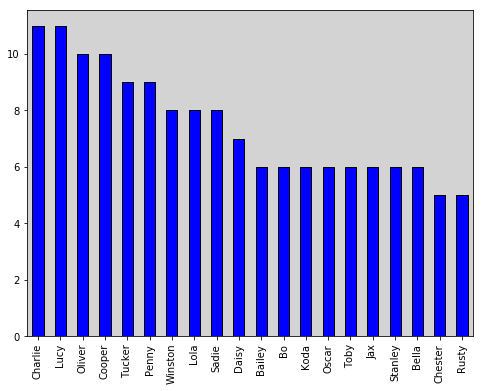

In [108]:
fig, ax = plt.subplots(figsize=(8,6))

df_master['dog_name'].value_counts().head(20).plot(kind = 'bar', color = "blue", ax = ax, edgecolor = ['Black']*len(names))
ax.set_facecolor('lightgrey')
plt.show();

## II. Most Beloved Dog Breeds


I analyzed the relationship between tfavorite_counte and dog breeds p1 to find out which dog breeds are the most beloved by the users.

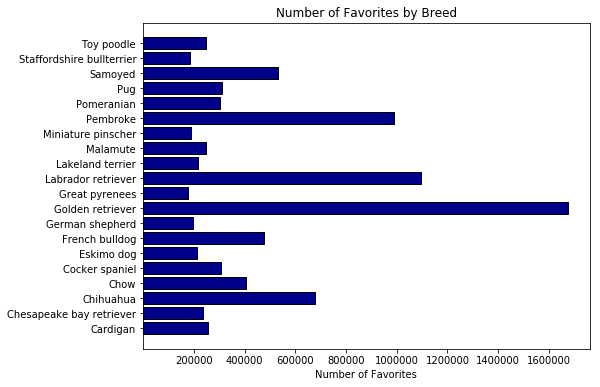

In [154]:
# Creating a favorite dataframe by the groupped breeds, counted the favorites.
df_favorite_count = df_master.groupby('p1')['favorite_count'].sum().reset_index()
df_sorted = df_favorite_count.sort_values('favorite_count', ascending=False).head(20)
fav = df_sorted['favorite_count']
breed = df_sorted['p1']

fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(breed, fav, color = "darkblue", edgecolor = ['Black']*len(ser_breed))
plt.xlabel('Number of Favorites')
plt.title('Number of Favorites by Breed')
plt.xticks(np.arange(200000, 1800000, 200000))
plt.show();

## III. Dog Stages

I analyzed the specific "dog stages", excluding the missing values to make a pie chart about the proportions of the categories. The most often used stage is "pupper" with more than 65%, the second one is "doggo" (about 22%). The account owners use the words puppo and floofer in 10% of the cases alltogether.

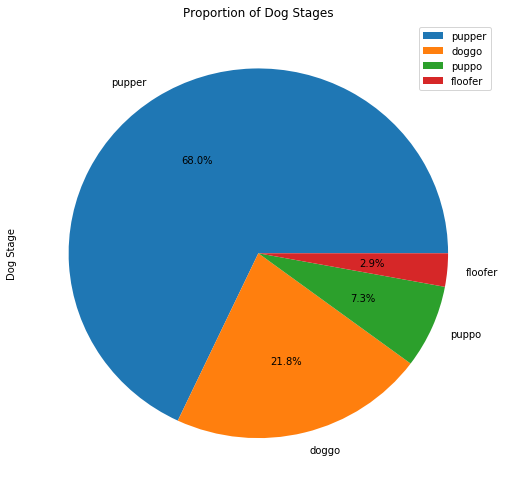

In [127]:
# Exclude the cases where the dog stage is missing.
df_stage = df_master[df_master['stages'] != "None"]
fig, ax = plt.subplots(figsize=(8.5,8.5))

df_stage['stages'].value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%')
plt.title('Proportion of Dog Stages')
plt.legend()

## IIII. Most Rated Breeds

I analyzed the relationship between ratings and dog breeds p1 to find out which dog breeds are the most rated.

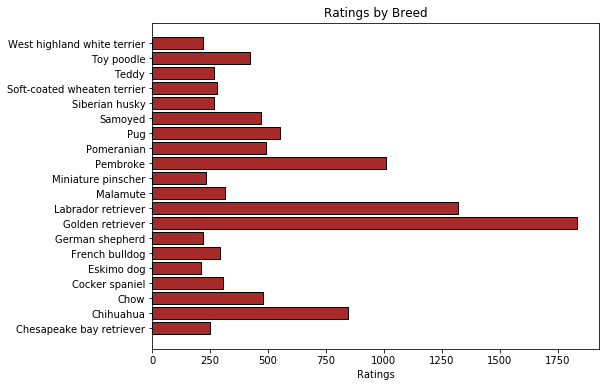

In [153]:
# Exclude the negative or null values from the dataframe
df_ratings = df_master[df_master['rating_10_scaled'] > 0]
df_ratings = df_master.groupby('p1')['rating_10_scaled'].sum().reset_index()
df_sorted2 = df_ratings.sort_values('rating_10_scaled', ascending=False).head(20)
rating = df_sorted2['rating_10_scaled']
breed = df_sorted2['p1']

fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(breed, rating, color = "brown", edgecolor = ['Black']*len(ser_breed))
plt.xlabel('Ratings')
plt.title('Ratings by Breed')
plt.show();

## V. The relation between rating and vote count for the top twenty breeds

- I wanted to discover if the top rated breeds have a high favorite count from the users or not.
- The figure shows that the most rated breeds tend to have a high vote count as well.

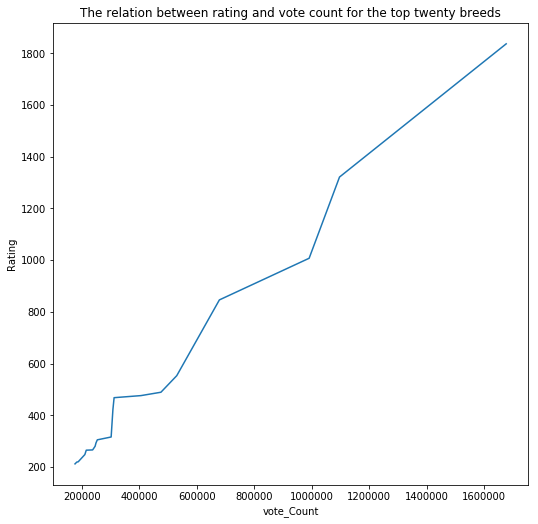

In [157]:
fig, ax = plt.subplots(figsize=(8.5,8.5))

plt.plot(df_sorted['favorite_count'], rating)
plt.title('The relation between rating and vote count for the top twenty breeds')
plt.xlabel('vote_Count')
plt.ylabel('Rating')
plt.show()

## IV. Discover Correlations

- There is no correlation between rating and favorite count and retweet count.

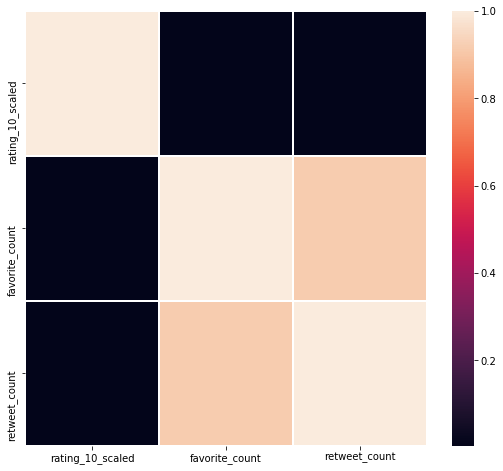

In [160]:
# Creating a smaller df with the numerical values to make a hetmap matrix of the correlations
df_corr_values = df_master[['rating_10_scaled', 'favorite_count', 'retweet_count']]

fig, ax = plt.subplots(figsize=(9,8))
correlation = df_corr_values.corr()

sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values,
            ax=ax,
            linewidth= 0.5);